In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import tkinter
import sklearn
import pyecharts
from pyecharts.charts import *
from pyecharts.commons.utils import JsCode
from pyecharts import options as opts
from pyecharts.options.global_options import ThemeType
plt.rcParams['font.sans-serif'] = ['SimHei']#显示中文
plt.rcParams['axes.unicode_minus'] = False	#显示负号

In [11]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(pyecharts.__version__)
print(tkinter.TkVersion)
print(sklearn.__version__)

1.24.3
1.4.2
3.5.3
0.12.2
1.9.1
8.6
1.0.2


In [2]:
df = pd.read_csv('数据/indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [3]:
set(df['state'])

{'-1',
 'Andhra Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Jammu & Kashmir',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'NCT of Delhi',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


# 数据预处理

In [5]:
# 检测重复值
df.duplicated().sum()

0

In [6]:
#检测缺失值:Null。region有一个null值
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [ ]:
df.fillna('Other region')

In [3]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


# EDA分析

## 字符型变量EDA分析

In [7]:
#共255种美食
len(set(df['name']))

255

### 分析饮食类型

In [8]:
df_diet = df['diet'].value_counts().reset_index()

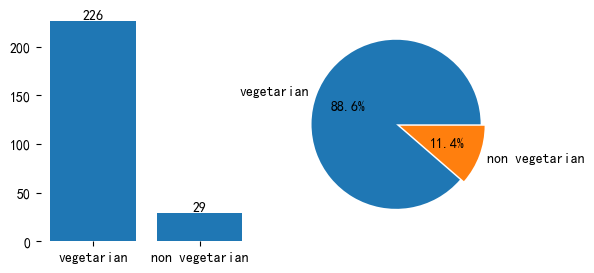

In [9]:
plt.figure(figsize=(6,3))
plt.title("饮食类型分布")
plt.subplot(121)
p1=plt.bar(df_diet["index"],df_diet["diet"])
ax=plt.gca() 
ax.spines['top'].set_color('none')#顶部没了
ax.spines['right'].set_color('none')#右边没了
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.bar_label(p1,label_type='edge')
plt.subplot(122)
plt.pie(df_diet["diet"],explode=(0.05,0), labels=df_diet["index"],autopct='%.1f%%',)#显示百分比
plt.show()

### 分析风味特征

In [10]:

df_flavor = df['flavor_profile'].value_counts().reset_index()
df_flavor

,index,flavor_profile
0,spicy,133
1,sweet,88
2,-1,29
3,bitter,4
4,sour,1


由数据可知,风味特征出现了-1值,该值视为缺失值,根据该列的实际含义,我们将其转换为其他风味:other

In [11]:
df['flavor_profile'] = df['flavor_profile'].replace('-1','other')
df_flavor = df['flavor_profile'].value_counts().reset_index()
df_flavor

,index,flavor_profile
0,spicy,133
1,sweet,88
2,other,29
3,bitter,4
4,sour,1


In [12]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def bar_color(data):
    blue_colors = ['#D4EEFF', '#1E90FF']  # 淡蓝色到深蓝色
    cmap = LinearSegmentedColormap.from_list('my_cmap', blue_colors)
    norm = plt.Normalize(data.min(), data.max())
    norm_y = norm(data)
    color = cmap(norm_y)  # 
    return color

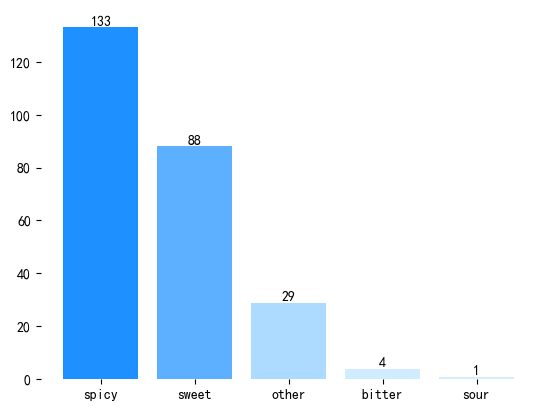

In [13]:
p1=plt.bar(df_flavor["index"],df_flavor["flavor_profile"],color=bar_color(df_flavor["flavor_profile"]))
ax=plt.gca() 
ax.spines['top'].set_color('none')#顶部没了
ax.spines['right'].set_color('none')#右边没了
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.bar_label(p1,label_type='edge')
plt.show()

In [14]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

### 分析菜肴类型

In [15]:

df_course = df['course'].value_counts().reset_index()
df_course

,index,course
0,main course,129
1,dessert,85
2,snack,39
3,starter,2


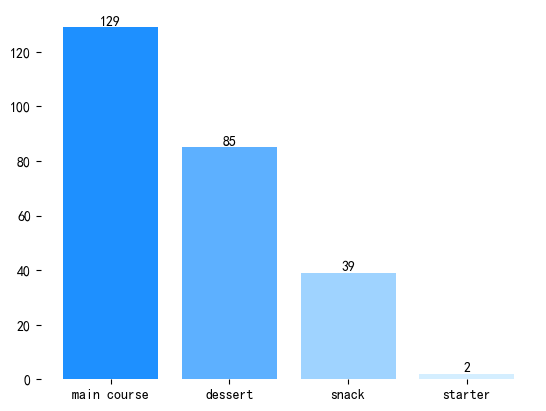

In [16]:
p1=plt.bar(df_course["index"],df_course["course"],color=bar_color(df_course["course"]))
ax=plt.gca() 
ax.spines['top'].set_color('none')#顶部没了
ax.spines['right'].set_color('none')#右边没了
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.bar_label(p1,label_type='edge')
plt.show()

### 分析州

In [17]:
df_state = df['state'].value_counts().reset_index()
df_state

,index,state
0,Gujarat,35
1,Punjab,32
2,Maharashtra,30
3,West Bengal,24
4,-1,24
5,Assam,21
6,Tamil Nadu,20
7,Andhra Pradesh,10
8,Uttar Pradesh,9
9,Kerala,8


可以看到,州名中有-1值,将其视为空值,根据该特征实际含义,将其填补为其他州:Other state

In [18]:
df['state'] = df['state'].replace('-1','Other state')
df_state =df['state'].value_counts().reset_index()
df_state

,index,state
0,Gujarat,35
1,Punjab,32
2,Maharashtra,30
3,West Bengal,24
4,Other state,24
5,Assam,21
6,Tamil Nadu,20
7,Andhra Pradesh,10
8,Uttar Pradesh,9
9,Kerala,8


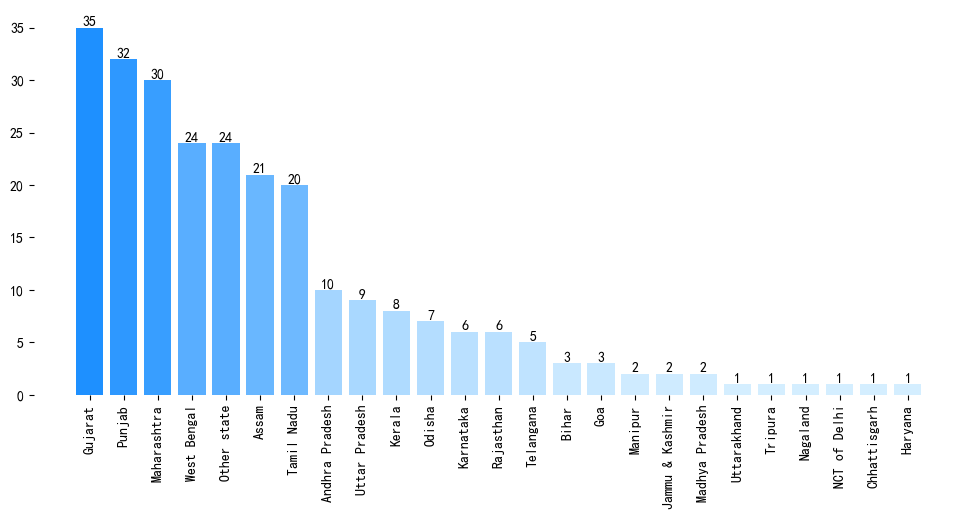

In [19]:
plt.figure(figsize=(12,5))
p1=plt.bar(df_state["index"],df_state["state"],color=bar_color(df_state["state"]))
ax=plt.gca() 
ax.spines['top'].set_color('none')#顶部没了
ax.spines['right'].set_color('none')#右边没了
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.bar_label(p1,label_type='edge')
plt.xticks(rotation=90)
plt.show()

### 分析各地区

In [20]:

df_region = df['region'].value_counts().reset_index()
df_region

,index,region
0,West,74
1,South,59
2,North,49
3,East,31
4,North East,25
5,-1,13
6,Central,3


In [21]:
df_region = df['region'].value_counts().reset_index()
df_region

,index,region
0,West,74
1,South,59
2,North,49
3,East,31
4,North East,25
5,-1,13
6,Central,3


同样的,将-1值和1个null值填补为其它地区:Other region

In [22]:
df.fillna('Other region',inplace=True)
df['region'] =  df['region'].replace('-1','Other region')
df_region = df['region'].value_counts().reset_index()
df_region

,index,region
0,West,74
1,South,59
2,North,49
3,East,31
4,North East,25
5,Other region,14
6,Central,3


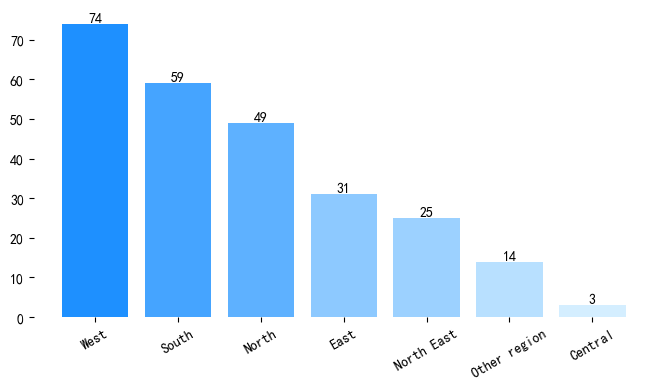

In [23]:
plt.figure(figsize=(8,4))
p1=plt.bar(df_region["index"],df_region["region"],color=bar_color(df_region["region"]))
ax=plt.gca() 
ax.spines['top'].set_color('none')#顶部没了
ax.spines['right'].set_color('none')#右边没了
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.bar_label(p1,label_type='edge')
plt.xticks(rotation=30)
plt.show()

### 食材成份分析


In [24]:
#该特征是每行都有多个食材名称在内,以逗号分隔,那么我们可以统计这255种美食共用了多少食材
df['ingredients'].head()

0                      Maida flour, yogurt, oil, sugar
1                              Gram flour, ghee, sugar
2         Carrots, milk, sugar, ghee, cashews, raisins
3    Flour, ghee, kewra, milk, clarified butter, su...
4    Milk powder, plain flour, baking powder, ghee,...
Name: ingredients, dtype: object

In [25]:
ingredients = set()
for item in df['ingredients']:
    ingredients.update(str(item).lower().split(","))
    
print("共有",len(ingredients),"种食材")

共有 425 种食材


在查看各个食材时会发现一些问题,同样的食材名称有的前或后有空格,导致统计食材数目时有偏差,现在来解决这个问题

In [26]:
ingred=[]
for i in ingredients:
    str1 = i.lstrip()
    str2 = str1.rstrip()
    # print(str2)
    ingred.append(str2)

In [27]:
#总共365种食材
len(set(ingred))

365

## 连续性变量分析

### 准备时间分析

In [28]:
df['prep_time'].describe()

count    255.000000
mean      31.105882
std       72.554409
min       -1.000000
25%       10.000000
50%       10.000000
75%       20.000000
max      500.000000
Name: prep_time, dtype: float64

可以看到,准备时间最小是-1,需要对其做处理

In [29]:
# 有30种美食准备时间是缺失的,我们不能轻易将其剔除
len(df[df['prep_time']==-1])

30

In [30]:
df[df['prep_time']==-1]
#从这里可以发现,在准备时间为-1时,烹饪时间也有许多-1值,继续查看烹饪时间的

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,Chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
167,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
172,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
185,Ghooghra,"Dry fruits, semolina, all purpose flour",vegetarian,-1,-1,spicy,snack,Gujarat,West


### 烹饪时间分析

In [31]:

df['cook_time'].describe()

count    255.000000
mean      34.529412
std       48.265650
min       -1.000000
25%       20.000000
50%       30.000000
75%       40.000000
max      720.000000
Name: cook_time, dtype: float64

同样的,也需要处理这个-1值

In [32]:
len(df[df['cook_time']==-1])

28

In [33]:
df[df['cook_time']==-1]
# 可以看到,烹饪时间为-1的同时,准备时间也是-1,那么此时对-1值的处理就比较棘手,我们现将其转为nan值

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
167,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
172,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
185,Ghooghra,"Dry fruits, semolina, all purpose flour",vegetarian,-1,-1,spicy,snack,Gujarat,West
187,Halvasan,"Whole wheat rava, chia seed, lemon, edible gum...",vegetarian,-1,-1,sweet,dessert,Gujarat,West
213,Mag Dhokli,"Moong beans, jaggery, red chillies, oil, salt",vegetarian,-1,-1,spicy,snack,Gujarat,West


In [34]:
df['prep_time'] = df['prep_time'].replace(-1,np.nan)
df['cook_time'] = df['cook_time'].replace(-1,np.nan)

In [35]:
print(df['prep_time'].describe())
print(df['cook_time'].describe())

count    225.000000
mean      35.386667
std       76.241081
min        5.000000
25%       10.000000
50%       10.000000
75%       20.000000
max      500.000000
Name: prep_time, dtype: float64
count    227.000000
mean      38.911894
std       49.421711
min        2.000000
25%       20.000000
50%       30.000000
75%       45.000000
max      720.000000
Name: cook_time, dtype: float64


C:\Users\11834\AppData\Local\Temp\ipykernel_1888\4220587856.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g_prep_time = sns.distplot(df["prep_time"], ax=axes[0])
C:\Users\11834\AppData\Local\Temp\ipykernel_1888\4220587856.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g_cook_time = sns.distplot(df["cook_time"]

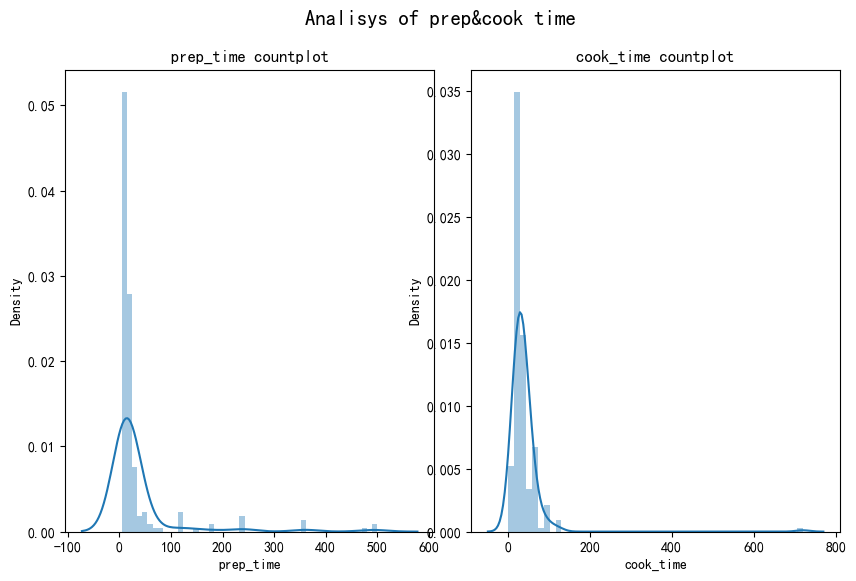

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,6),gridspec_kw=dict(wspace=0.1, hspace=0.6))
fig.suptitle("Analisys of prep&cook time", fontsize=15)

g_prep_time = sns.distplot(df["prep_time"], ax=axes[0])
g_prep_time.set_title("prep_time countplot")

g_cook_time = sns.distplot(df["cook_time"], ax=axes[1])
g_cook_time.set_title("cook_time countplot")
plt.show()

# 数据特征处理

In [37]:
#将准备时间和烹饪时间相加得到总共时间:total_time
df['total_time'] = df['prep_time']+df['cook_time']
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0


In [38]:
df.to_csv('clean_data.csv')

# 数据分析

In [4]:
df = pd.read_csv('数据/clean_data.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0


## （1）对于name 特征分析：

### 共有多少种美食？

In [47]:
#共255种美食
len(set(df['name']))

255

### 各地区的美食种数？

In [64]:
df_region = df['region'].value_counts().reset_index()
df_region

,index,region
0,West,74
1,South,59
2,North,49
3,East,31
4,North East,25
5,Other region,14
6,Central,3


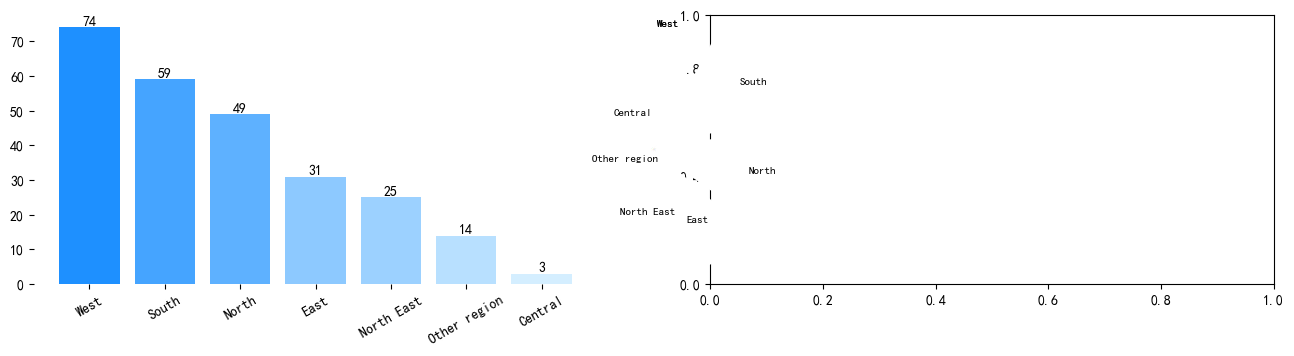

In [49]:
plt.figure(figsize=(16,3.5))
plt.subplot(121)
p1=plt.bar(df_region["index"],df_region["region"],color=bar_color(df_region["region"]))
ax=plt.gca() 
ax.spines['top'].set_color('none')#顶部没了
ax.spines['right'].set_color('none')#右边没了
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.bar_label(p1,label_type='edge')
plt.xticks(rotation=30)

plt.subplot(122)
jiaodu=np.linspace(0,2*np.pi,len(df_region["region"]),endpoint=False)
fig=plt.axes(polar=True)
fig.set_theta_direction(-1)#反转图像
fig.set_theta_zero_location('N')#north朝上
color=['r','g','b','y','plum','gold','lime']
yeji=np.concatenate((df_region["region"],[df_region["region"][0]]))
jiaodu=np.concatenate((jiaodu,[jiaodu[0]]))
name=np.concatenate((df_region["index"],[df_region["index"][0]]))
plt.bar(jiaodu,yeji,width=0.33,color=color)

#挖孔
plt.bar(jiaodu,height=130,color='w')
#关闭坐标轴
plt.gca().set_axis_off()
#添加标签
for jiaodu,yeji,name in zip(jiaodu,yeji,name):
    plt.text(jiaodu+0.03,yeji+50,str(name),fontsize=8)
plt.show()

In [50]:
df_region

,index,region
0,West,74
1,South,59
2,North,49
3,East,31
4,North East,25
5,Other region,14
6,Central,3


In [66]:
data_pair = [(row['index'], row['region']) for _, row in df_region.iterrows()]
# data_pair = sorted(data_pair, key=lambda x: x[1], reverse=True)
data_pair

[('West', 74),
 ('South', 59),
 ('North', 49),
 ('East', 31),
 ('North East', 25),
 ('Other region', 14),
 ('Central', 3)]

In [67]:
#图形绘制
x_data = df_region['index'].to_list()
def barPage() -> Bar:
    bar1 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
        df_region['region'].to_list(),
            category_gap="30%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
        )
    )
    bar1.set_global_opts(
        title_opts=opts.TitleOpts(title="",pos_left='16%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45}),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_region['region'].to_list()),
            max_=max(df_region['region'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar1
def piePage() -> Pie:
    colors=['#0780cf', '#fa4343', '#61a0a8', '#d48265', '#749f83', '#ca8622', '#bda29a']
    pie2 = (Pie()
        .add('', data_pair,
            radius=["20%", "60%"],
            center=["50%", "50%"],#圆心位置，第一个坐标点为横轴位置，第二个坐标点为纵轴位置
            rosetype="radius"
            )
            .set_colors(colors)  # 设置颜色
        .set_global_opts(title_opts=opts.TitleOpts(title="",
                                                    pos_left = "43%",pos_top = "5%"),
                            legend_opts=opts.LegendOpts(is_show=False),)
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%",position='outside')) # 显示在图形的标签形式
        )
    return pie2
page = (
    Page(layout=Page.DraggablePageLayout)
    .add(
        barPage(),
        piePage(),
    )
)
page.render('各地区美食种数组合图.html')


'd:\\泰迪培训\\python数据分析\\印度美食分析与相似性研究\\各地区美食种数组合图.html'

In [68]:
Page.save_resize_html("各地区美食种数组合图.html",   # 上面的HTML文件名称
                      cfg_file="chart_config_1.json",  # 保存的json配置文件
                      dest="new_各地区美食种数组合图.html")  # 新HTML文件名称

'<!DOCTYPE html>\n<html>\n<head>\n    <meta charset="UTF-8">\n    <title>Awesome-pyecharts</title>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/echarts.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery-ui.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/ResizeSensor.js"></script>\n\n            <link rel="stylesheet"  href="https://assets.pyecharts.org/assets/jquery-ui.css">\n\n</head>\n<body>\n    <style>.box {  }; </style>\n        \n    <div class="box">\n                <div id="68c5da224ed747999a51fe4252ae75c7" class="chart-container" style="position: absolute; width: 512.4px; height: 268.4px; top: 31.399999618530273px; left: 8px;"></div>\n    <script>\n        var chart_68c5da224ed747999a51fe4252ae75c7 = echarts.init(\n            d

### 各邦美食种数 :考虑使用地图

In [168]:
df_state = df['state'].value_counts().reset_index()
df_state.sort_values('state',inplace=True)

In [170]:
df_state.to_csv('各州美食数.csv')

In [242]:
data_pair = [(row['index'], row['state']) for _, row in df_state.iterrows()]
data_pair = sorted(data_pair, key=lambda x: x[1], reverse=True)

data_pair

[('Gujarat', 35),
 ('Punjab', 32),
 ('Maharashtra', 30),
 ('Other state', 24),
 ('West Bengal', 24),
 ('Assam', 21),
 ('Tamil Nadu', 20),
 ('Andhra Pradesh', 10),
 ('Uttar Pradesh', 9),
 ('Kerala', 8),
 ('Odisha', 7),
 ('Rajasthan', 6),
 ('Karnataka', 6),
 ('Telangana', 5),
 ('Goa', 3),
 ('Bihar', 3),
 ('Madhya Pradesh', 2),
 ('Jammu & Kashmir', 2),
 ('Manipur', 2),
 ('Haryana', 1),
 ('NCT of Delhi', 1),
 ('Nagaland', 1),
 ('Tripura', 1),
 ('Uttarakhand', 1),
 ('Chhattisgarh', 1)]

In [253]:
#图形绘制
x_data = df_state['index'].to_list()
def barPage() -> Bar:
    bar1 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
        df_state['state'].to_list(),
            category_gap="30%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
        )
        .reversal_axis()
    )
    bar1.set_series_opts(label_opts=opts.LabelOpts(position="right"))
    bar1.set_global_opts(
        title_opts=opts.TitleOpts(title="",pos_left='16%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=False),
        # yaxis_opts=opts.AxisOpts(is_show=False),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_state['state'].to_list()),
            max_=max(df_state['state'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar1
def piePage() -> Pie:
    colors=['#0780cf', '#fa4343', '#61a0a8', '#d48265', '#749f83', '#ca8622', '#bda29a']
    pie2 = (Pie()
        .add('', data_pair,
            radius=["20%", "60%"],
            center=["50%", "50%"],#圆心位置，第一个坐标点为横轴位置，第二个坐标点为纵轴位置
            rosetype="radius"
            )
            .set_colors(colors)  # 设置颜色
        .set_global_opts(title_opts=opts.TitleOpts(title="",
                                                    pos_left = "43%",pos_top = "5%"),
                            legend_opts=opts.LegendOpts(is_show=False),)
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%",position='outside')) # 显示在图形的标签形式
        )
    return pie2

page = (
    Page(layout=Page.DraggablePageLayout)
    .add(
        barPage(),
        piePage(),
    )
)
page.render_notebook()

### 美食所花费时间分布

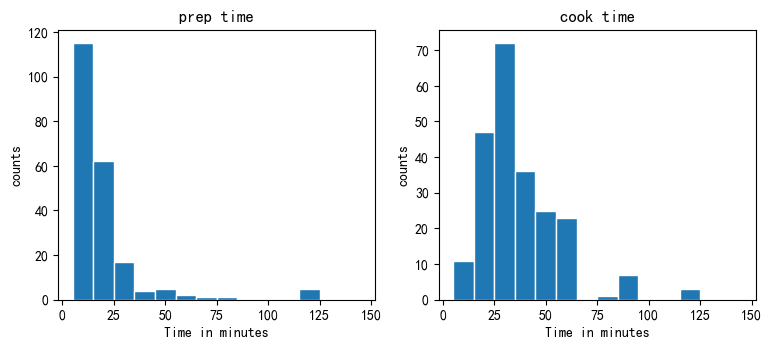

In [260]:
plt.figure(figsize=(9,3.5))
plt.subplot(121)
plt.hist(df['prep_time'],np.arange(5,150,10),edgecolor='w')

plt.title("prep time")
plt.ylabel("counts")
plt.xlabel("Time in minutes")
plt.subplot(122)
plt.hist(df['cook_time'],np.arange(5,150,10),edgecolor='w')

plt.title("cook time")
plt.ylabel("counts")
plt.xlabel("Time in minutes")
plt.show()

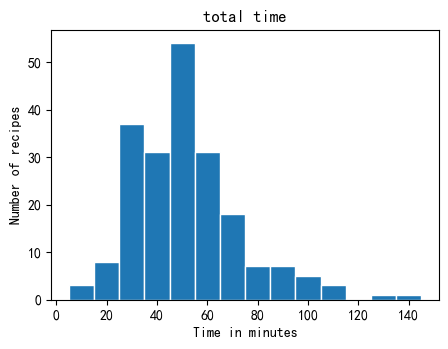

In [262]:
plt.figure(figsize=(5,3.5))
plt.hist(df['total_time'],np.arange(5,150,10),edgecolor='w')

plt.title("total time")
plt.ylabel("Number of recipes")
plt.xlabel("Time in minutes")

plt.show()

## （2）对于diet特征分析

### 素食和非素食美食有多少？

In [69]:
df_diet = df['diet'].value_counts().reset_index()
df_diet

,index,diet
0,vegetarian,226
1,non vegetarian,29


In [77]:
def barPage() -> Bar:
    x_data = df_diet['index'].to_list()
    bar1 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
        df_diet['diet'].to_list(),
            category_gap="35%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
        )
    )
    bar1.set_series_opts(label_opts=opts.LabelOpts(position="top"))
    bar1.set_global_opts(
        title_opts=opts.TitleOpts(title="",pos_left='16%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_diet['diet'].to_list()),
            max_=max(df_diet['diet'].to_list()),
            range_color = ['#FA786A','#32CD32'],
            is_show=False,
        )
    )

    grid = Grid()
    grid.add(bar1,grid_opts=opts.GridOpts(width='40%', height='40%',pos_left="5%", pos_right="20%"), is_control_axis_index=True)#width调整粗细
    return grid
def piePage() -> Pie:
    data_pair = [(row['index'], row['diet']) for _, row in df_diet.iterrows()]
    # data_pair = sorted(data_pair, key=lambda x: x[1], reverse=True)
    colors=['#32CD32', '#FA786A']
    pie2 = (Pie()
        .add('', data_pair,
            radius=["0%", "60%"],
            )
            .set_colors(colors)  # 设置颜色
        .set_global_opts(title_opts=opts.TitleOpts(title="",
                                                    pos_left = "43%",pos_top = "5%"),
                            legend_opts=opts.LegendOpts(is_show=False),)
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%",position='inside')) # 显示在图形的标签形式
        )
    return pie2
page = (
    Page(layout=Page.DraggablePageLayout)
    .add(
        barPage(),
        piePage(),
    )
)
page.render('素食和非素食美食种数组合图.html')

'd:\\泰迪培训\\python数据分析\\印度美食分析与相似性研究\\素食和非素食美食种数组合图.html'

In [78]:
Page.save_resize_html("素食和非素食美食种数组合图.html",   # 上面的HTML文件名称
                      cfg_file="chart_config_2.json",  # 保存的json配置文件
                      dest="new_素食和非素食美食种数组合图.html")  # 新HTML文件名称

'<!DOCTYPE html>\n<html>\n<head>\n    <meta charset="UTF-8">\n    <title>Awesome-pyecharts</title>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/echarts.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery-ui.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/ResizeSensor.js"></script>\n\n            <link rel="stylesheet"  href="https://assets.pyecharts.org/assets/jquery-ui.css">\n\n</head>\n<body>\n    <style>.box {  }; </style>\n        \n    <div class="box">\n                <div id="e93954e44e2b429c896882c57154aa83" class="chart-container" style="position: absolute; width: 602.4px; height: 347.4px; top: 31.399999618530273px; left: 8px;"></div>\n    <script>\n        var chart_e93954e44e2b429c896882c57154aa83 = echarts.init(\n            d

### 每个邦的素食和非素食美食种数有多少？
使用tableau绘制

In [173]:
df_diet_state = pd.pivot_table(data=df,index='state',columns='diet',values='name',aggfunc='count').reset_index()
df_diet_state.fillna(0,inplace=True)
df_diet_state.to_csv('各州素食非素食美食总数.csv')

### 每个地区的素食和非素食美食种数有多少？
分组柱形图 or 堆叠柱形图

In [79]:
df_diet_region = pd.pivot_table(data=df,index='region',columns='diet',values='name',aggfunc='count')
df_diet_region.fillna(0,inplace=True)

In [101]:
df_diet_region.index.to_list()

['Central', 'East', 'North', 'North East', 'Other region', 'South', 'West']

In [84]:
df_diet_region.sort_values('vegetarian',ascending=False,inplace=True)

In [88]:
# 绘制分组柱形图
x_data = df_diet_region.index.to_list()
bar = Bar()
bar.add_xaxis(x_data)
bar.add_yaxis('素食', df_diet_region['vegetarian'].tolist(),gap="0%",color='#FA786A')
bar.add_yaxis('非素食',df_diet_region['non vegetarian'].tolist(),gap="0%",color='#32CD32')
# bar.set_series_opts(label_opts={'position': 'inside'})
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="",
                              pos_left='15%',pos_top="1%",
                              title_textstyle_opts=opts.TextStyleOpts(font_size=15)
                              ),
    xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=True),
)
bar.set_series_opts(
    label_opts=opts.LabelOpts(
        position="top",
        formatter=JsCode(
            "function(params){return params.value.toFixed(0);}"
        ),
    ),
)
grid = Grid()
grid.add(bar,grid_opts=opts.GridOpts(width='70%', height='45%',pos_top="5%",pos_left="12%", pos_right="20%"), is_control_axis_index=True)#width调整粗细
grid.render_notebook()

### 素食和非素食的平均准备时间、平均烹饪时间以及平均总时间比较。

对于旅游的游客来说,似乎没什么人会关心美食到底需要多久才能做好,所以不必过多深入分析

In [106]:
df_hun = df[df['diet']=='non vegetarian']
df_su = df[df['diet']=='vegetarian']

In [108]:
df_hun['prep_time'].mean(),df_su['prep_time'].mean()

(41.8421052631579, 34.79126213592233)

In [109]:
df_hun['cook_time'].mean(),df_su['cook_time'].mean()

(40.0, 38.8125)

In [110]:
df_hun['total_time'].mean(),df_su['total_time'].mean()

(81.84210526315789, 73.39805825242719)

总的来说,非素食所花费的时间会更高

## （3）对于食材ingredients特征分析

### 哪些食材用的多？
词云图 &条形图

In [15]:
ingredientsList=[]
for i in range(0,len(df)):
    ingredientsList.append(df['ingredients'][i].split(","))
flat_list = []
for sublist in ingredientsList:
    for item in sublist:
        flat_list.append(item)    
countIngredients=[]
ingred=[]
for i in flat_list:
    str1 = i.lstrip()
    str1 = str1.lower()
    str2 = str1.rstrip()
    ingred.append(str2)


for i in ingred:
   countIngredients.append(ingred.count(i))
flat_small=map(lambda x:x.lower(), ingred)
Ingredients_df = pd.DataFrame(list(zip(flat_small, countIngredients)), 
               columns =['Ingredient', 'Occurrence'])
sorted=Ingredients_df.sort_values(by=['Occurrence'], ascending=False)
unique_ingredients=sorted.drop_duplicates()
unique_ingredients

,Ingredient,Occurrence
138,sugar,48
699,ginger,29
262,garam masala,27
146,ghee,25
714,curry leaves,25
...,...,...
536,fish fillets,1
534,biryani masala powder,1
531,marinade,1
523,baby corn,1


In [16]:
ingred1 = [item.replace(' ', '_') for item in ingred]
ingred1

['maida_flour',
 'yogurt',
 'oil',
 'sugar',
 'gram_flour',
 'ghee',
 'sugar',
 'carrots',
 'milk',
 'sugar',
 'ghee',
 'cashews',
 'raisins',
 'flour',
 'ghee',
 'kewra',
 'milk',
 'clarified_butter',
 'sugar',
 'almonds',
 'pistachio',
 'saffron',
 'green_cardamom',
 'milk_powder',
 'plain_flour',
 'baking_powder',
 'ghee',
 'milk',
 'sugar',
 'water',
 'rose_water',
 'sugar_syrup',
 'lentil_flour',
 'maida',
 'corn_flour',
 'baking_soda',
 'vinegar',
 'curd',
 'water',
 'turmeric',
 'saffron',
 'cardamom',
 'cashews',
 'ghee',
 'cardamom',
 'sugar',
 'milk',
 'cottage_cheese',
 'sugar',
 'milk',
 'rice',
 'sugar',
 'dried_fruits',
 'gram_flour',
 'ghee',
 'sugar',
 'yogurt',
 'milk',
 'nuts',
 'sugar',
 'refined_flour',
 'besan',
 'ghee',
 'powdered_sugar',
 'yoghurt',
 'green_cardamom',
 'firm_white_pumpkin',
 'sugar',
 'kitchen_lime',
 'alum_powder',
 'rice',
 'sugar',
 'nuts',
 'condensed_milk',
 'sugar',
 'spices',
 'nuts',
 'semolina',
 'ghee',
 'nuts',
 'milk',
 'khoa',
 'coco

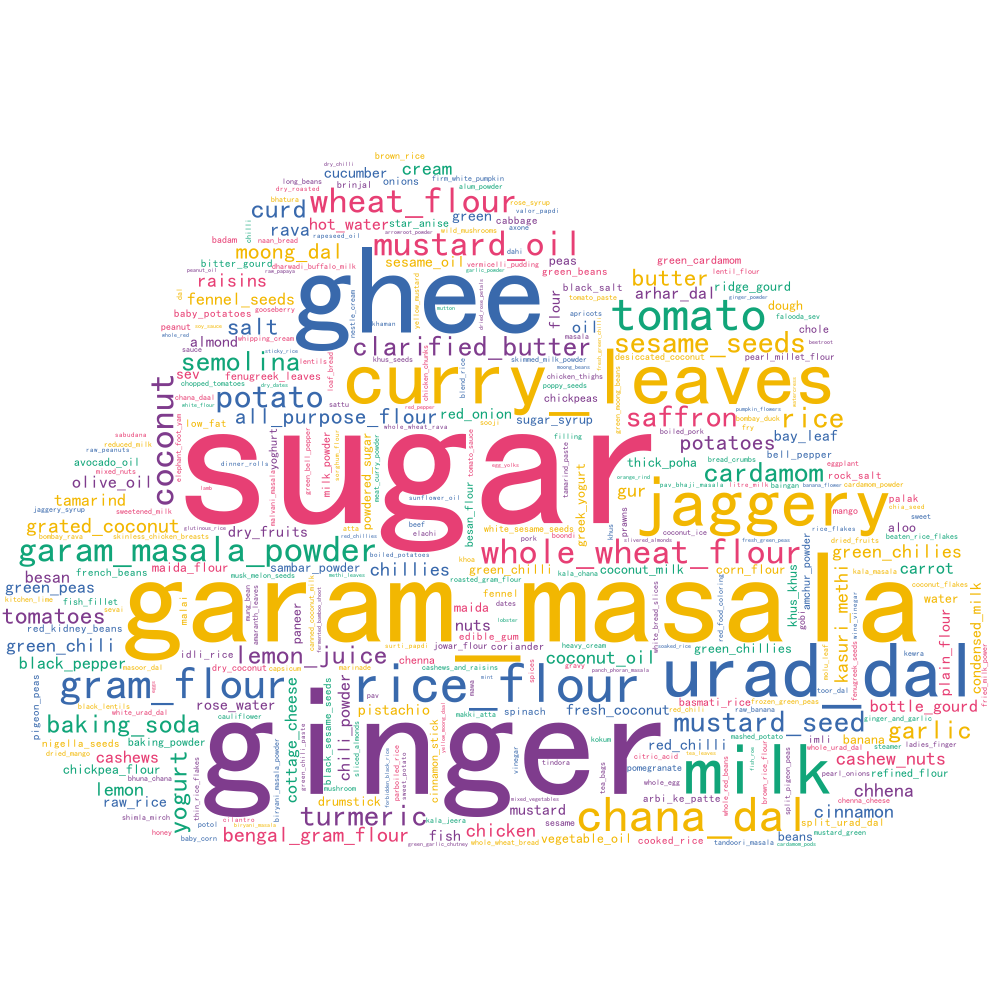

In [17]:
import stylecloud
from IPython.display import Image 
stylecloud.gen_stylecloud(text=" ".join(ingred1), collocations=False,
                          font_path='C://Windows//Fonts//simhei.ttf',##########设置字体,否则中文不显示
                          icon_name='fas fa-cloud',####图标形状
                          size=1000,
                          output_name='./食材词云.png')
Image(filename='./食材词云.png')

In [97]:
ingredients_top15 = unique_ingredients.head(15)
ingredients_top15.sort_values('Occurrence',inplace=True)

C:\Users\11834\AppData\Local\Temp\ipykernel_5840\2231331185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingredients_top15.sort_values('Occurrence',inplace=True)


In [98]:
ingredients_top15

,Ingredient,Occurrence
1064,mustard oil,12
921,whole wheat flour,12
320,garam masala powder,13
385,gram flour,13
340,chana dal,16
591,tomato,16
265,rice flour,21
657,milk,21
817,jaggery,21
146,ghee,25


In [106]:
max(ingredients_top15['Occurrence'].to_list())

48

In [120]:
x_data = ingredients_top15['Ingredient'].to_list()
bar1 = (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis(
        "",
        ingredients_top15['Occurrence'].to_list(),
        category_gap="35%",   #柱子间隔
        label_opts=opts.LabelOpts(is_show=True),
    )
    .reversal_axis()
)
bar1.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar1.set_global_opts(
    title_opts=opts.TitleOpts(title="",pos_left='16%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
    xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=False),
    visualmap_opts=opts.VisualMapOpts(
        type_="color",
        min_=0,
        max_=14,
        range_color = ['#87CEFA','#5793f3'],
        is_show=False,
    )
)

grid = Grid()
grid.add(bar1,grid_opts=opts.GridOpts(width='30%', height='75%',pos_left="15%", pos_right="20%"), is_control_axis_index=True)#width调整粗细

grid.render_notebook()

### 共有多少种食材

In [5]:
ingredients = set()
for item in df['ingredients']:
    ingredients.update(str(item).lower().split(","))
ingred=[]
for i in ingredients:
    str1 = i.lstrip()
    str2 = str1.rstrip()
    ingred.append(str2)
len(set(ingred))

365

#### 素食和非素食的食材是可以重叠的,比如盐

In [151]:
# 素食食材有多少？
ingredients = set()
for item in df_su['ingredients']:
    ingredients.update(str(item).lower().split(","))
ingred=[]
for i in ingredients:
    str1 = i.lstrip()
    str2 = str1.rstrip()
    ingred.append(str2)
len(set(ingred))

321

In [152]:
# 非素食食材有多少？
ingredients = set()
for item in df_hun['ingredients']:
    ingredients.update(str(item).lower().split(","))
ingred=[]
for i in ingredients:
    str1 = i.lstrip()
    str2 = str1.rstrip()
    ingred.append(str2)
len(set(ingred))

96

### 素食中哪些食材用的多？

In [4]:
df_hun = df[df['diet']=='non vegetarian']
df_su = df[df['diet']=='vegetarian']
df_su.reset_index(inplace=True)
df_hun.reset_index(inplace=True)

In [121]:
ingredientsList=[]
for i in range(0,len(df_su)):
    ingredientsList.append(df_su['ingredients'][i].split(","))
flat_list = []
for sublist in ingredientsList:
    for item in sublist:
        flat_list.append(item)    
countIngredients=[]
ingred=[]
for i in flat_list:
    str1 = i.lstrip()
    str1 = str1.lower()
    str2 = str1.rstrip()
    ingred.append(str2)


for i in ingred:
   countIngredients.append(ingred.count(i))
flat_small=map(lambda x:x.lower(), ingred)
Ingredients_df = pd.DataFrame(list(zip(flat_small, countIngredients)), 
               columns =['Ingredient', 'Occurrence'])
sorted=Ingredients_df.sort_values(by=['Occurrence'], ascending=False)
unique_ingredients=sorted.drop_duplicates()
unique_ingredients

,Ingredient,Occurrence
833,sugar,47
532,urad dal,25
94,ghee,25
619,curry leaves,24
483,ginger,23
...,...,...
634,sevai,1
635,parboiled rice,1
636,steamer,1
644,whole red beans,1


In [24]:
ingred1 = [item.replace(' ', '_') for item in ingred]

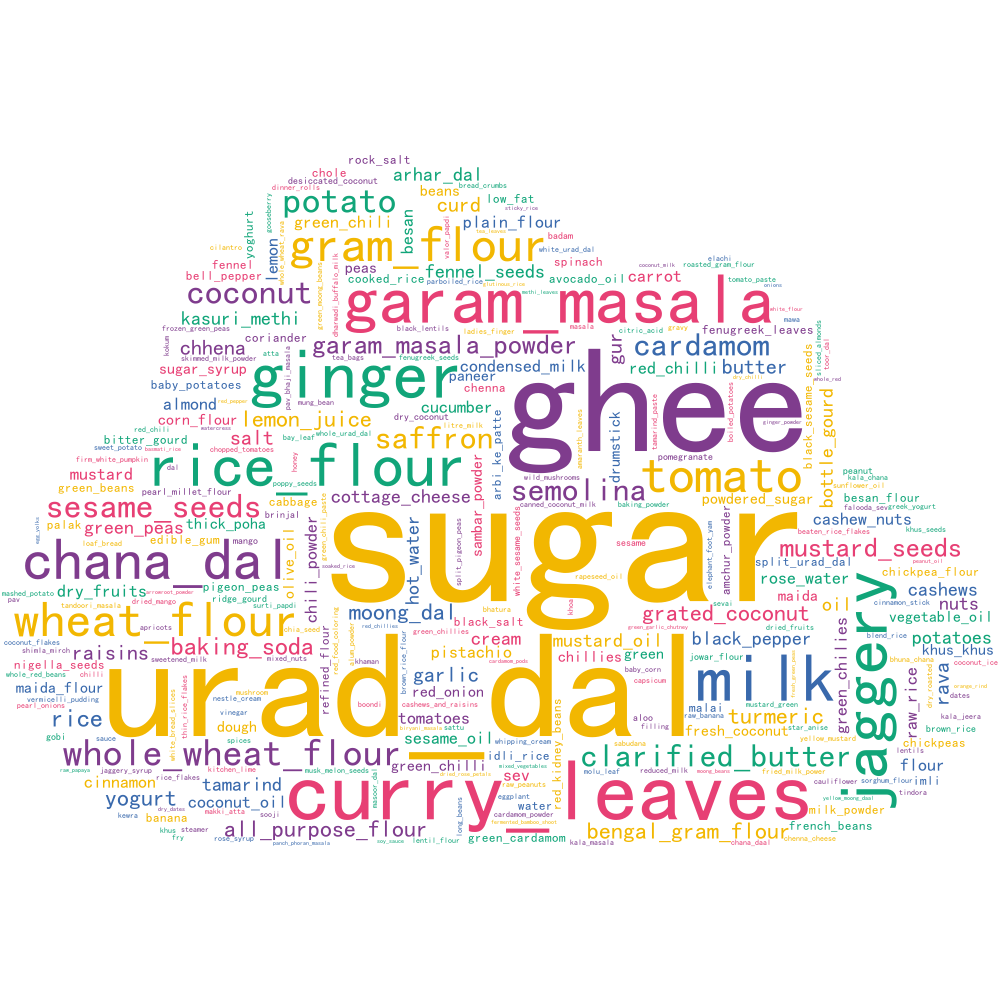

In [25]:
import stylecloud
from IPython.display import Image 
stylecloud.gen_stylecloud(text=" ".join(ingred1), collocations=False,
                          font_path='C://Windows//Fonts//simhei.ttf',##########设置字体,否则中文不显示
                          icon_name='fas fa-cloud',####图标形状
                          size=1000,
                          output_name='./素食食材词云1.png')
Image(filename='./素食食材词云1.png')

In [122]:
ingredients_top15 = unique_ingredients.head(15)
ingredients_top15.sort_values('Occurrence',inplace=True)

C:\Users\11834\AppData\Local\Temp\ipykernel_5840\2231331185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingredients_top15.sort_values('Occurrence',inplace=True)


In [133]:
x_data = ingredients_top15['Ingredient'].to_list()
bar1 = (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis(
        "",
    ingredients_top15['Occurrence'].to_list(),
        category_gap="35%",   #柱子间隔
        label_opts=opts.LabelOpts(font_weight=10,is_show=True),
    )
    .reversal_axis()
)
bar1.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar1.set_global_opts(
    title_opts=opts.TitleOpts(title="素食食材排行",pos_left='16%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
    xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=False),
    # yaxis_opts=opts.AxisOpts(is_show=False),
    visualmap_opts=opts.VisualMapOpts(
        type_="color",
        # min_=min(ingredients_top15['Occurrence'].to_list()),
        # max_=max(ingredients_top15['Occurrence'].to_list()),
        min_=0,
        max_=14,
        range_color = ['#C0FCC6','#00FA9A','#32CD32'],
        # is_piecewise=True,
        is_show=False,
    )
)

grid = Grid()
grid.add(bar1,grid_opts=opts.GridOpts(width='30%', height='75%',pos_left="15%", pos_right="20%"), is_control_axis_index=True)#width调整粗细

grid.render_notebook()

### 非素食中哪些食材用的多？

In [134]:
ingredientsList=[]
for i in range(0,len(df_hun)):
    ingredientsList.append(df_hun['ingredients'][i].split(","))
flat_list = []
for sublist in ingredientsList:
    for item in sublist:
        flat_list.append(item)    
countIngredients=[]
ingred=[]
for i in flat_list:
    str1 = i.lstrip()
    str1 = str1.lower()
    str2 = str1.rstrip()
    ingred.append(str2)
for i in ingred:
   countIngredients.append(ingred.count(i))
flat_small=map(lambda x:x.lower(), ingred)
Ingredients_df = pd.DataFrame(list(zip(flat_small, countIngredients)), 
               columns =['Ingredient', 'Occurrence'])
sorted=Ingredients_df.sort_values(by=['Occurrence'], ascending=False)
unique_ingredients=sorted.drop_duplicates()
unique_ingredients

,Ingredient,Occurrence
96,mustard oil,7
38,chicken,6
61,ginger,6
55,garam masala,4
41,garam masala powder,4
...,...,...
70,malvani masala,1
69,bombay duck,1
18,star anise,1
67,fresh coconut,1


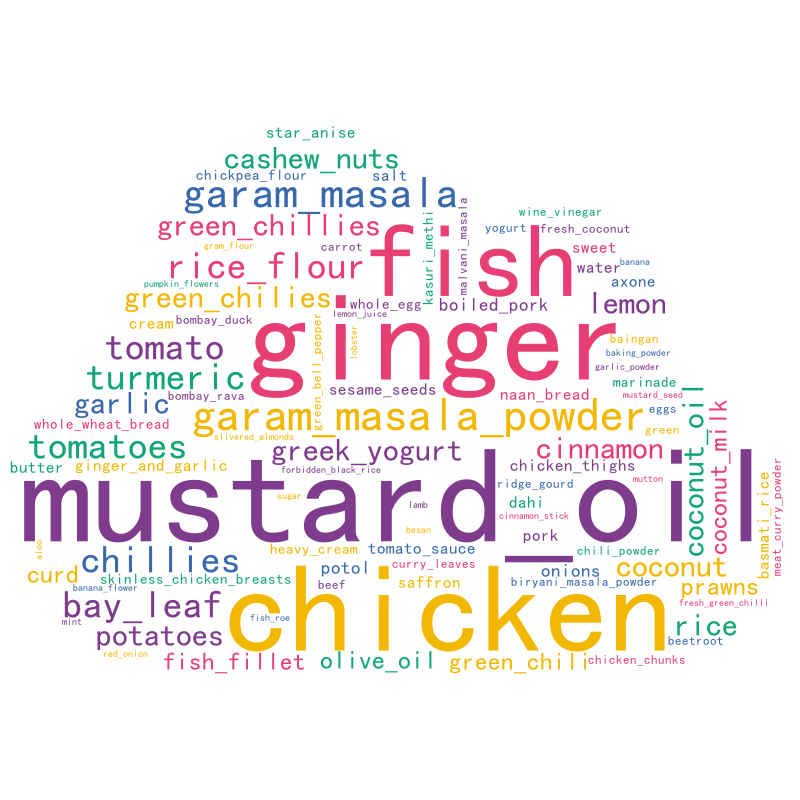

In [22]:
import stylecloud
from IPython.display import Image 
stylecloud.gen_stylecloud(text=" ".join(ingred1), collocations=False,
                          font_path='C://Windows//Fonts//simhei.ttf',##########设置字体,否则中文不显示
                          icon_name='fas fa-cloud',####图标形状
                          size=800,
                          output_name='./非素食食材词云.png')
Image(filename='./非素食食材词云.png')

In [137]:
ingredients_top15 = unique_ingredients.head(15)
ingredients_top15.sort_values('Occurrence',inplace=True)
x_data = ingredients_top15['Ingredient'].to_list()
bar1 = (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis(
        "",
    ingredients_top15['Occurrence'].to_list(),
        category_gap="35%",   #柱子间隔
        label_opts=opts.LabelOpts(is_show=True),
    )
    .reversal_axis()
)
bar1.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar1.set_global_opts(
    title_opts=opts.TitleOpts(title="非素食食材排行",pos_left='16%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
    xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=False),
    # yaxis_opts=opts.AxisOpts(is_show=False),
    visualmap_opts=opts.VisualMapOpts(
        type_="color",
        # min_=min(ingredients_top15['Occurrence'].to_list()),
        # max_=max(ingredients_top15['Occurrence'].to_list()),
        min_=0,
        max_=14,
        range_color = ['#E5B97F','#E9967A','#FA786A'],
        # is_piecewise=True,
        is_show=False,
    )
)

grid = Grid()
grid.add(bar1,grid_opts=opts.GridOpts(width='30%', height='75%',pos_left="15%", pos_right="20%"), is_control_axis_index=True)#width调整粗细
grid.render_notebook()

C:\Users\11834\AppData\Local\Temp\ipykernel_5840\4049589846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingredients_top15.sort_values('Occurrence',inplace=True)


## （4）对于flavor_profile特征分析

### 各种风味的美食有多少？

In [138]:
df_flavor = df['flavor_profile'].value_counts().reset_index()
df_flavor

,index,flavor_profile
0,spicy,133
1,sweet,88
2,other,29
3,bitter,4
4,sour,1


In [141]:
def barPage() -> Bar:
    x_data = df_flavor['index'].to_list()
    bar1 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
        df_flavor['flavor_profile'].to_list(),
            category_gap="35%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
        )
    )
    bar1.set_series_opts(label_opts=opts.LabelOpts(position="top"))
    bar1.set_global_opts(
        title_opts=opts.TitleOpts(title="",pos_left='16%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_flavor['flavor_profile'].to_list()),
            max_=max(df_flavor['flavor_profile'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            is_show=False,
        )
    )

    grid = Grid()
    grid.add(bar1,grid_opts=opts.GridOpts(width='50%', height='45%',pos_left="5%", pos_right="20%"), is_control_axis_index=True)#width调整粗细
    return grid
def piePage() -> Pie:
    data_pair = [(row['index'], row['flavor_profile']) for _, row in df_flavor.iterrows()]
    data_pair
    colors=['#0780cf', '#fa4343','#61a0a8', '#d48265', '#749f83']
    pie2 = (Pie()
        .add('', data_pair,
            radius=["25%", "60%"],
            )
            .set_colors(colors)  # 设置颜色
        .set_global_opts(title_opts=opts.TitleOpts(title="",
                                                    pos_left = "43%",pos_top = "5%"),
                            legend_opts=opts.LegendOpts(is_show=False),)
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%",position='outside')) # 显示在图形的标签形式
        )
    return pie2
page = (
    Page(layout=Page.DraggablePageLayout)
    .add(
        barPage(),
        piePage(),
    )
)
page.render('各种风味的美食种数组合图.html')


'd:\\泰迪培训\\python数据分析\\印度美食分析与相似性研究\\各种风味的美食种数组合图.html'

In [142]:
Page.save_resize_html("各种风味的美食种数组合图.html",   # 上面的HTML文件名称
                      cfg_file="chart_config_3.json",  # 保存的json配置文件
                      dest="new_各种风味的美食种数组合图.html")  # 新HTML文件名称

'<!DOCTYPE html>\n<html>\n<head>\n    <meta charset="UTF-8">\n    <title>Awesome-pyecharts</title>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/echarts.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery-ui.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/ResizeSensor.js"></script>\n\n            <link rel="stylesheet"  href="https://assets.pyecharts.org/assets/jquery-ui.css">\n\n</head>\n<body>\n    <style>.box {  }; </style>\n        \n    <div class="box">\n                <div id="9f79933652144f9e96b30ae2e5f97495" class="chart-container" style="position: absolute; width: 808.4px; height: 419.4px; top: 31.399999618530273px; left: 10px;"></div>\n    <script>\n        var chart_9f79933652144f9e96b30ae2e5f97495 = echarts.init(\n            

### 各种风味的素食和非素食又有多少？

In [143]:
df_flavor_diet = pd.pivot_table(data=df,index='flavor_profile',columns='diet',values='name',aggfunc='count')
df_flavor_diet.fillna(0,inplace=True)
df_flavor_diet.sort_values('vegetarian',ascending=False,inplace=True)

In [145]:
# 绘制分组柱形图
x_data = df_flavor_diet.index.to_list()
bar = Bar()
bar.add_xaxis(x_data)
bar.add_yaxis('素食', df_flavor_diet['vegetarian'].tolist(),gap="0%",color='#FA786A')
bar.add_yaxis('非素食',df_flavor_diet['non vegetarian'].tolist(),gap="0%",color='#32CD32')

# bar.set_series_opts(label_opts={'position': 'inside'})
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="",
                              pos_left='30%',pos_top="1%",
                              title_textstyle_opts=opts.TextStyleOpts(font_size=15)
                              ),
    xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":0},is_show=True),
)
bar.set_series_opts(
    label_opts=opts.LabelOpts(
        position="top",
        formatter=JsCode(
            "function(params){return params.value.toFixed(0);}"
        ),
    ),
)
grid = Grid()
grid.add(bar,grid_opts=opts.GridOpts(width='70%', height='50%',pos_top="5%",pos_left="12%", pos_right="20%"), is_control_axis_index=True)#width调整粗细
grid.render_notebook()

### 各个邦的美食风味怎么样？
使用Tableau

In [175]:
df_flavor_state = pd.pivot_table(data=df,index='state',columns='flavor_profile',values='name',aggfunc='count').reset_index()
df_flavor_state.fillna(0,inplace=True)
df_flavor_state.to_csv('各州美食风味.csv')

### 各个地区的美食风味怎么样？

In [160]:
df_flavor_region = pd.pivot_table(data=df,index='region',columns='flavor_profile',values='name',aggfunc='count')
df_flavor_region.fillna(0,inplace=True)

In [161]:
df_flavor_region

flavor_profile,bitter,other,sour,spicy,sweet
region,,,,,
Central,0.0,0.0,0.0,2.0,1.0
East,0.0,3.0,0.0,6.0,22.0
North,2.0,2.0,0.0,35.0,10.0
North East,0.0,5.0,0.0,13.0,7.0
Other region,0.0,2.0,0.0,6.0,6.0
South,0.0,10.0,0.0,30.0,19.0
West,2.0,7.0,1.0,41.0,23.0


In [165]:
x_data = df_flavor_region.index.to_list()
def barPage1() -> Bar:
    bar1 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
            df_flavor_region['other'].to_list(),
            category_gap="60%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
            color='#5793f3'
        )
    )
    bar1.set_global_opts(
        title_opts=opts.TitleOpts(title="other",pos_left='40%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=True),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_flavor_region['other'].to_list()),
            max_=max(df_flavor_region['other'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar1
def barPage2() -> Bar:
    bar2 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
            df_flavor_region['sweet'].to_list(),
            category_gap="60%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
            color='#87CEFA'
        )
    )
    bar2.set_global_opts(
        title_opts=opts.TitleOpts(title="sweet",pos_left='40%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=True),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_flavor_region['sweet'].to_list()),
            max_=max(df_flavor_region['sweet'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar2
def barPage3() -> Bar:
    bar3 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
            df_flavor_region['bitter'].to_list(),
            category_gap="60%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
            color='#87CEFA'
        )
    )
    bar3.set_global_opts(
        title_opts=opts.TitleOpts(title="bitter",pos_left='40%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=True),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_flavor_region['bitter'].to_list()),
            max_=max(df_flavor_region['bitter'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar3
def barPage4() -> Bar:
    bar4 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
            df_flavor_region['sour'].to_list(),
            category_gap="60%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
            color='#87CEFA'
        )
    )
    bar4.set_global_opts(
        title_opts=opts.TitleOpts(title="sour",pos_left='40%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=True),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_flavor_region['sour'].to_list()),
            max_=max(df_flavor_region['sour'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar4
def barPage5() -> Bar:
    bar5 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
            df_flavor_region['spicy'].to_list(),
            category_gap="60%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
            color='#87CEFA'
        )
        # .reversal_axis()
    )
    bar5.set_global_opts(
        title_opts=opts.TitleOpts(title="spicy",pos_left='40%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=True),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_flavor_region['spicy'].to_list()),
            max_=max(df_flavor_region['spicy'].to_list()),
            # min_=0,
            # max_=6,
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar5
page = (
    Page(layout=Page.DraggablePageLayout)
    .add(
        barPage1(),
        barPage2(),
        barPage3(),
        barPage4(),
        barPage5(),
    )
)
page.render('各地区美食风味.html')

'd:\\泰迪培训\\python数据分析\\印度美食分析与相似性研究\\各地区美食风味.html'

In [167]:
Page.save_resize_html("各地区美食风味.html",   # 上面的HTML文件名称
                      cfg_file="chart_config_6.json",  # 保存的json配置文件
                      dest="new_各地区美食风味.html")  # 新HTML文件名称

'<!DOCTYPE html>\n<html>\n<head>\n    <meta charset="UTF-8">\n    <title>Awesome-pyecharts</title>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/echarts.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery-ui.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/ResizeSensor.js"></script>\n\n            <link rel="stylesheet"  href="https://assets.pyecharts.org/assets/jquery-ui.css">\n\n</head>\n<body>\n    <style>.box {  }; </style>\n        \n    <div class="box">\n                <div id="bb332789b727475baa766588d1d7e8af" class="chart-container" style="position: absolute; width: 428.4px; height: 177.4px; top: 215.40000915527344px; left: 10px;"></div>\n    <script>\n        var chart_bb332789b727475baa766588d1d7e8af = echarts.init(\n            

### 各个风味的美食所花费时间？
没什么好分析的

## （5）对于course特征分析

### 各类型美食有多少？

In [147]:
df_course = df['course'].value_counts().reset_index()
df_course.head()

,index,course
0,main course,129
1,dessert,85
2,snack,39
3,starter,2


In [148]:
def barPage() -> Bar:
    x_data = df_course['index'].to_list()
    bar1 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
        df_course['course'].to_list(),
            category_gap="35%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
        )
    )
    bar1.set_series_opts(label_opts=opts.LabelOpts(position="top"))
    bar1.set_global_opts(
        title_opts=opts.TitleOpts(title="",pos_left='16%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_course['course'].to_list()),
            max_=max(df_course['course'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    grid = Grid()
    grid.add(bar1,grid_opts=opts.GridOpts(width='50%', height='40%',pos_left="5%", pos_right="20%"), is_control_axis_index=True)#width调整粗细
    return grid
def piePage() -> Pie:
    data_pair = [(row['index'], row['course']) for _, row in df_course.iterrows()]
    colors=['#0780cf', '#fa4343','#61a0a8', '#d48265', '#749f83']
    pie2 = (Pie()
        .add('', data_pair,
            radius=["25%", "60%"],
            )
            .set_colors(colors)  # 设置颜色
        .set_global_opts(title_opts=opts.TitleOpts(title="",
                                                    pos_left = "43%",pos_top = "5%"),
                            legend_opts=opts.LegendOpts(is_show=False),)
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%",position='outside')) # 显示在图形的标签形式
        )
    return pie2
page = (
    Page(layout=Page.DraggablePageLayout)
    .add(
        barPage(),
        piePage(),
    )
)
page.render('各类型美食种数组合图.html')

'd:\\泰迪培训\\python数据分析\\印度美食分析与相似性研究\\各类型美食种数组合图.html'

In [149]:
Page.save_resize_html("各类型美食种数组合图.html",   # 上面的HTML文件名称
                      cfg_file="chart_config_4.json",  # 保存的json配置文件
                      dest="new_各类型美食种数组合图.html")  # 新HTML文件名称

'<!DOCTYPE html>\n<html>\n<head>\n    <meta charset="UTF-8">\n    <title>Awesome-pyecharts</title>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/echarts.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery-ui.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/ResizeSensor.js"></script>\n\n            <link rel="stylesheet"  href="https://assets.pyecharts.org/assets/jquery-ui.css">\n\n</head>\n<body>\n    <style>.box {  }; </style>\n        \n    <div class="box">\n                <div id="f56e4a5f7f0f426f8c6ba187efcfe62e" class="chart-container" style="position: absolute; width: 812.4px; height: 424.4px; top: 31.399999618530273px; left: 8px;"></div>\n    <script>\n        var chart_f56e4a5f7f0f426f8c6ba187efcfe62e = echarts.init(\n            d

### 各类型美食的素食和非素食有多少？

In [150]:
df_course_diet = pd.pivot_table(data=df,index='course',columns='diet',values='name',aggfunc='count')
df_course_diet.fillna(0,inplace=True)

In [151]:
df_course_diet.sort_values('vegetarian',ascending=False,inplace=True)

In [153]:
# 绘制分组柱形图
x_data = df_course_diet.index.to_list()
bar = Bar()
bar.add_xaxis(x_data)
bar.add_yaxis('素食', df_course_diet['vegetarian'].tolist(),gap="0%",color='#FA786A')
bar.add_yaxis('非素食',df_course_diet['non vegetarian'].tolist(),gap="0%",color='#32CD32')

# bar.set_series_opts(label_opts={'position': 'inside'})
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="",
                              pos_left='30%',pos_top="1%",
                              title_textstyle_opts=opts.TextStyleOpts(font_size=15)
                              ),
    xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":0},is_show=True),
)
bar.set_series_opts(
    label_opts=opts.LabelOpts(
        position="top",
        formatter=JsCode(
            "function(params){return params.value.toFixed(0);}"
        ),
    ),
)
grid = Grid()
grid.add(bar,grid_opts=opts.GridOpts(width='70%', height='50%',pos_top="5%",pos_left="12%", pos_right="20%"), is_control_axis_index=True)#width调整粗细
grid.render_notebook()

### 各个地区的美食类型怎样？

In [155]:
df_course_region = pd.pivot_table(data=df,index='region',columns='course',values='name',aggfunc='count')
df_course_region.fillna(0,inplace=True)
df_course_region

course,dessert,main course,snack,starter
region,,,,
Central,1.0,1.0,1.0,0.0
East,21.0,10.0,0.0,0.0
North,9.0,37.0,1.0,2.0
North East,7.0,18.0,0.0,0.0
Other region,6.0,4.0,4.0,0.0
South,18.0,31.0,10.0,0.0
West,23.0,28.0,23.0,0.0


In [158]:
x_data = df_course_region.index.to_list()
def barPage1() -> Bar:
    bar1 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
            df_course_region['dessert'].to_list(),
            category_gap="60%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
            color='#5793f3'
        )
    )
    bar1.set_global_opts(
        title_opts=opts.TitleOpts(title="dessert",pos_left='40%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=True),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_course_region['dessert'].to_list()),
            max_=max(df_course_region['dessert'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar1
def barPage2() -> Bar:
    bar2 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
            df_course_region['main course'].to_list(),
            category_gap="60%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
            color='#87CEFA'
        )
    )
    bar2.set_global_opts(
        title_opts=opts.TitleOpts(title="main course",pos_left='40%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=True),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_course_region['main course'].to_list()),
            max_=max(df_course_region['main course'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar2
def barPage3() -> Bar:
    bar3 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
            df_course_region['snack'].to_list(),
            category_gap="60%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
            color='#87CEFA'
        )
    )
    bar3.set_global_opts(
        title_opts=opts.TitleOpts(title="snack",pos_left='40%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=True),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_course_region['snack'].to_list()),
            max_=max(df_course_region['snack'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar3
def barPage4() -> Bar:
    bar4 = (
        Bar()
        .add_xaxis(x_data)
        .add_yaxis(
            "",
            df_course_region['starter'].to_list(),
            category_gap="60%",   #柱子间隔
            label_opts=opts.LabelOpts(is_show=True),
            color='#87CEFA'
        )
    )
    bar4.set_global_opts(
        title_opts=opts.TitleOpts(title="starter",pos_left='40%',title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
        xaxis_opts=opts.AxisOpts(name_rotate=60,axislabel_opts={"rotate":45},is_show=True),
        visualmap_opts=opts.VisualMapOpts(
            type_="color",
            min_=min(df_course_region['starter'].to_list()),
            max_=max(df_course_region['starter'].to_list()),
            range_color = ['#87CEFA','#5793f3'],
            # is_piecewise=True,
            is_show=False,
        )
    )
    return bar4
page = (
    Page(layout=Page.DraggablePageLayout)
    .add(
        barPage1(),
        barPage2(),
        barPage3(),
        barPage4(),
    )
)
page.render('各地区美食类型.html')


'd:\\泰迪培训\\python数据分析\\印度美食分析与相似性研究\\各地区美食类型.html'

In [159]:
Page.save_resize_html("各地区美食类型.html",   # 上面的HTML文件名称
                      cfg_file="chart_config_5.json",  # 保存的json配置文件
                      dest="new_各地区美食类型.html")  # 新HTML文件名称

'<!DOCTYPE html>\n<html>\n<head>\n    <meta charset="UTF-8">\n    <title>Awesome-pyecharts</title>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/echarts.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery-ui.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/ResizeSensor.js"></script>\n\n            <link rel="stylesheet"  href="https://assets.pyecharts.org/assets/jquery-ui.css">\n\n</head>\n<body>\n    <style>.box {  }; </style>\n        \n    <div class="box">\n                <div id="132b66af2b4e40c59e693a56dd523ce7" class="chart-container" style="position: absolute; width: 480.4px; height: 246.4px; top: 31.399999618530273px; left: 8px;"></div>\n    <script>\n        var chart_132b66af2b4e40c59e693a56dd523ce7 = echarts.init(\n            d

### 各个邦的美食类型怎样？
Tableau绘制

In [176]:
df_course_state = pd.pivot_table(data=df,index='state',columns='course',values='name',aggfunc='count').reset_index()
df_course_state.fillna(0,inplace=True)
df_course_state.to_csv('各州美食类型.csv')